## Quick Start

In [3]:
%matplotlib inline
import site
site.addsitedir(r'C:\Users\Ciaran\Documents\pycotools')
from pycotools import model, models, viz, tasks, misc
import os
import pandas

C:\Users\Ciaran\Documents\pycotools\pycotools\viz.py:117: FutureWarning: The pandas.parser module is deprecated and will be removed in a future version. Please import from the pandas.io.parser instead
  from pandas.parser import CParserError


root:INFO:25:    Initializing pycotools
root:INFO:26:    Initializing logging System
root:INFO:27:    logging config file at: C:\Users\Ciaran\Documents\pycotools\pycotools\logging_config.conf


### Create Michaelis-Menten Model

In [4]:
working_directory = r'C:\Users\Ciaran\Documents\PycotoolsQuickStart'
copasi_file = os.path.join(working_directory, 'quick_start_model.cps')

if os.path.isfile(copasi_file):
    os.remove(copasi_file)

    
kf = 0.01
kb = 0.1
kcat = 0.03
with model.Build(copasi_file) as m:
    m.name = 'Michaelis-Menten'
    m.add('compartment', name='Cell')
    
    m.add('metabolite', name='P', concentration=0)
    m.add('metabolite', name='S', concentration=50)
    m.add('metabolite', name='E', concentration=15)
    m.add('metabolite', name='ES', concentration=0)
    
    m.add('reaction', name='S bind E', expression='S + E -> ES', rate_law='kf*S*E',
          parameter_values={'kf': kf})
    
    m.add('reaction', name='S unbind E', expression='ES -> S + E', rate_law='kb*ES',
         parameter_values={'kb': kb})

    m.add('reaction', name='ES produce P', expression='ES -> P', rate_law='kcat*ES', 
          parameter_values={'kcat': kcat})
    
michaelis_menten = model.Model(copasi_file)

michaelis_menten

Model(name=Michaelis-Menten, time_unit=s, volume_unit=ml, quantity_unit=mmol)

### Simulate Michaelis-Menten model

In [70]:
TC = tasks.TimeCourse(michaelis_menten, end=100, step_size=0.01, intervals=0.01*100, 
                     report_name='MM-time-course.csv')

### Plot results

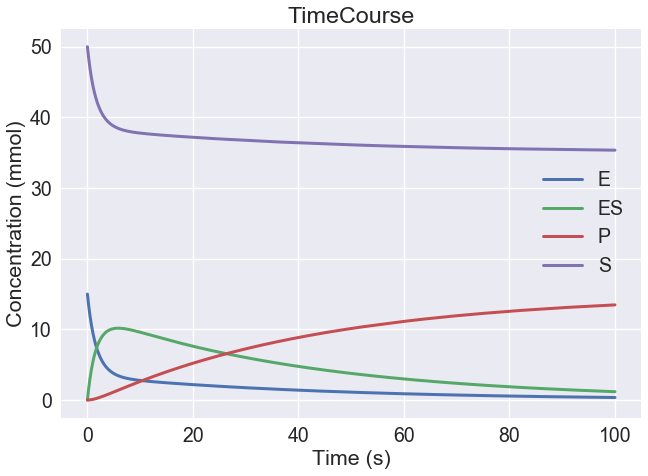

In [36]:
viz.PlotTimeCourse(TC, separate=False)

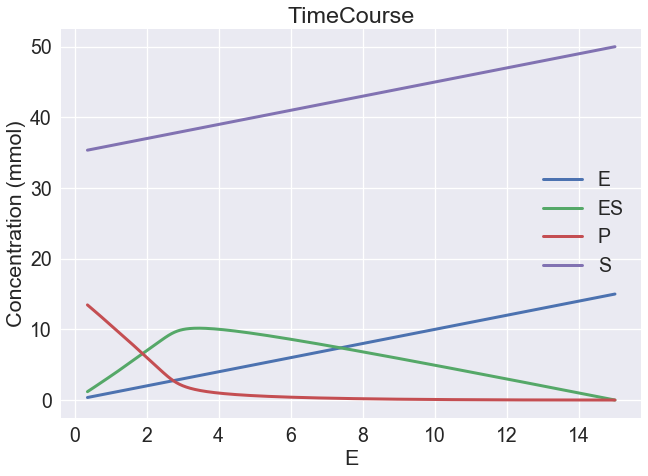

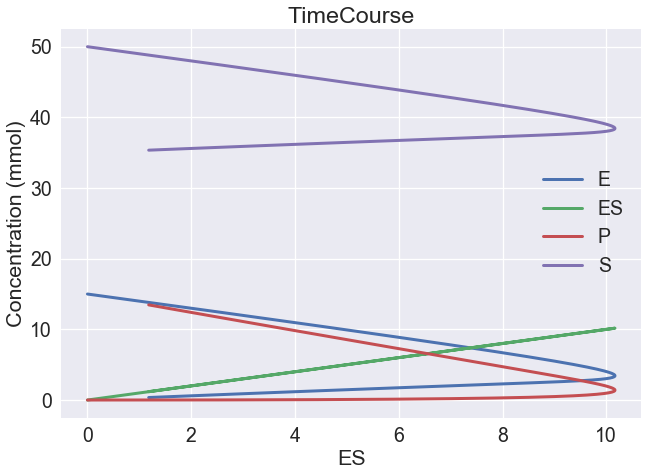

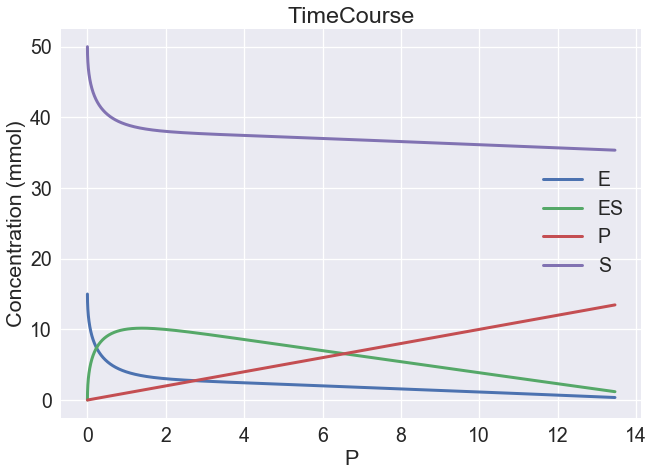

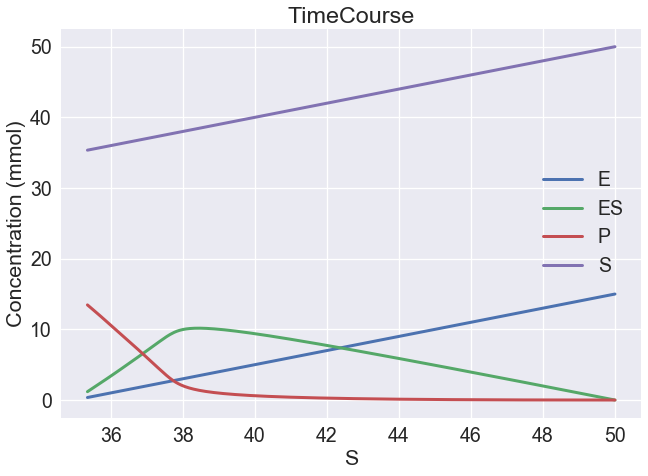

In [37]:
metabolite_names = [i.name for i in michaelis_menten.metabolites]
[viz.PlotTimeCourse(TC, x=i, separate=False) for i in metabolite_names]

### Inspect the model

In [38]:
print 'model has {} metabolites, {} reactions and {} local parameters'.format(
    len(michaelis_menten.metabolites),
    len(michaelis_menten.reactions),
    len(michaelis_menten.local_parameters)
)


model has 4 metabolites, 3 reactions and 3 local parameters


### Prepare Time Course Results for Parameter Estimation
Since copasi headers from copasi output looks like this:

In [39]:
pandas.read_csv(TC.report_name, sep='\t').head()

,Time,[E],[ES],[P],[S]
0,0.00,15.0000,0.000000,0.000000,50.0000
1,0.01,14.9253,0.074708,0.000011,49.9253
2,0.02,14.8511,0.148837,0.000045,49.8511
3,0.03,14.7775,0.222392,0.000100,49.7775
4,0.04,14.7044,0.295378,0.000178,49.7044


And we need exact match between variable names and data file headers, we can use the `misc.correct_copasi_timecourse_headers` function to automatically format the simulated time course data for us

In [71]:
misc.correct_copasi_timecourse_headers(TC.report_name)

,Time,E,ES,P,S
0,0.00,15.000000,0.000000,0.000000,50.0000
1,0.01,14.925200,0.074755,0.000011,49.9252
2,0.02,14.851000,0.148929,0.000045,49.8510
3,0.03,14.777400,0.222528,0.000100,49.7774
4,0.04,14.704300,0.295557,0.000178,49.7043
5,0.05,14.631700,0.368023,0.000278,49.6317
6,0.06,14.559700,0.439929,0.000399,49.5597
7,0.07,14.488200,0.511282,0.000541,49.4882
8,0.08,14.417200,0.582086,0.000705,49.4172
9,0.09,14.346800,0.652346,0.000890,49.3468


### Do parameter estimations
Spread computation over multiple model copies

In [74]:
PE = tasks.MultiParameterEstimation(michaelis_menten, TC.report_name, method='genetic_algorithm_sr', 
                                   copy_number=3, pe_number=20, population_size=50, 
                                   number_of_generations=100, metabolites=[], overwrite_config_file=True)
PE.write_config_file()
PE.setup()
PE.results_directory
PE.run()

'C:\\Users\\Ciaran\\Documents\\PycotoolsQuickStart\\MultipleParameterEstimationResults'

### Visualize data

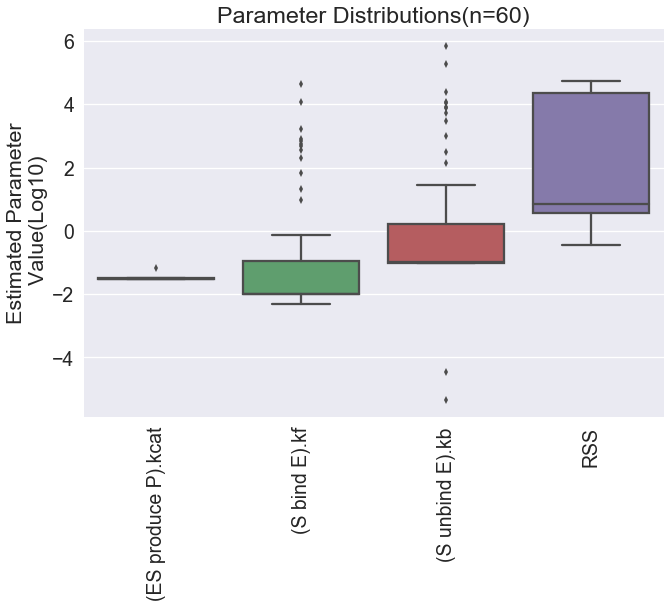

In [64]:
viz.Boxplots(PE, log10=True, num_per_plot=8)

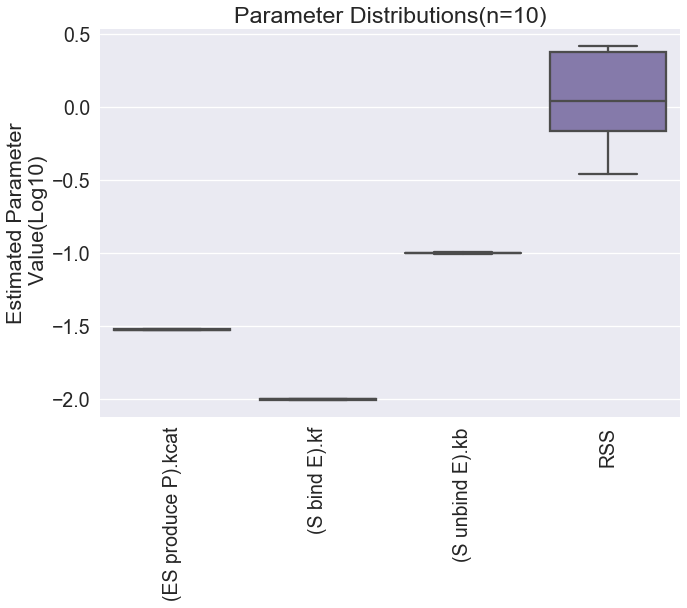

In [65]:
viz.Boxplots(PE, log10=True, num_per_plot=8, truncate_mode='ranks', theta=range(10))

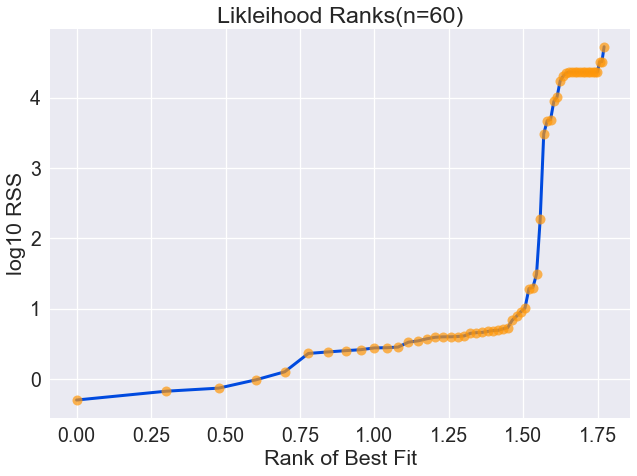

In [66]:
viz.LikelihoodRanks(PE, log10=True)

pycotools.viz:INFO:1353:    Plotting "E"
pycotools.viz:INFO:1353:    Plotting "ES"
pycotools.viz:INFO:1353:    Plotting "P"
pycotools.viz:INFO:1353:    Plotting "S"


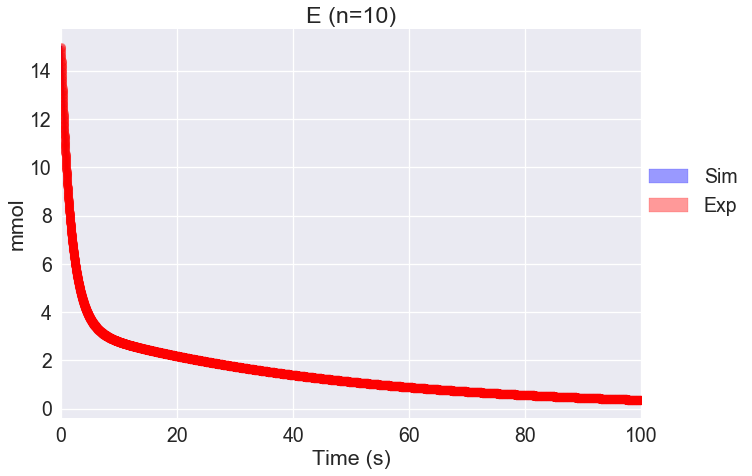

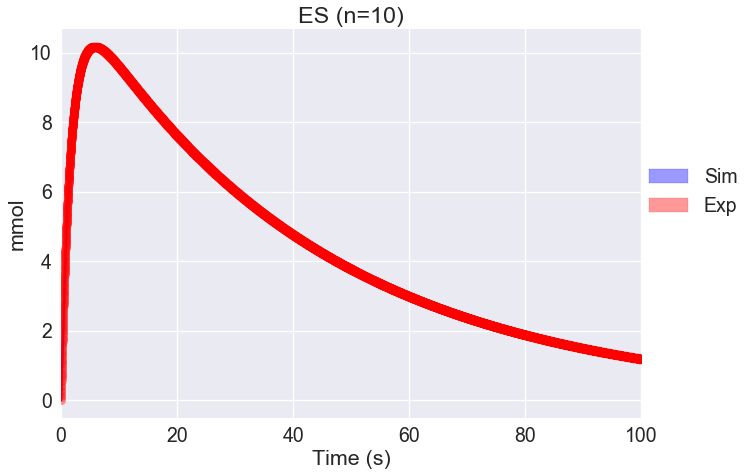

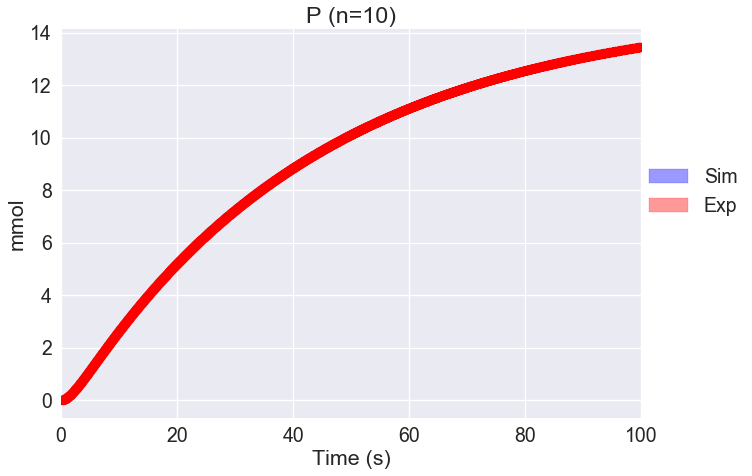

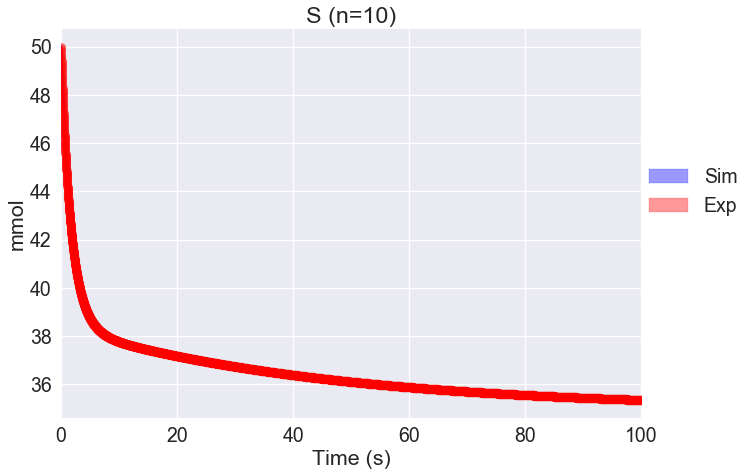

In [67]:
viz.PlotTimeCourseEnsemble(PE, truncate_mode='ranks', theta=range(10))

pycotools.viz:INFO:2404:    Plotting "(ES produce P).kcat" Vs "(ES produce P).kcat"
pycotools.viz:INFO:2404:    Plotting "(ES produce P).kcat" Vs "(S bind E).kf"
pycotools.viz:INFO:2404:    Plotting "(ES produce P).kcat" Vs "(S unbind E).kb"
pycotools.viz:INFO:2404:    Plotting "(ES produce P).kcat" Vs "RSS"
pycotools.viz:INFO:2404:    Plotting "(S bind E).kf" Vs "(ES produce P).kcat"
pycotools.viz:INFO:2404:    Plotting "(S bind E).kf" Vs "(S bind E).kf"
pycotools.viz:INFO:2404:    Plotting "(S bind E).kf" Vs "(S unbind E).kb"
pycotools.viz:INFO:2404:    Plotting "(S bind E).kf" Vs "RSS"
pycotools.viz:INFO:2404:    Plotting "(S unbind E).kb" Vs "(ES produce P).kcat"
pycotools.viz:INFO:2404:    Plotting "(S unbind E).kb" Vs "(S bind E).kf"
pycotools.viz:INFO:2404:    Plotting "(S unbind E).kb" Vs "(S unbind E).kb"
pycotools.viz:INFO:2404:    Plotting "(S unbind E).kb" Vs "RSS"
pycotools.viz:INFO:2404:    Plotting "RSS" Vs "(ES produce P).kcat"
pycotools.viz:INFO:2404:    Plotting "RSS"

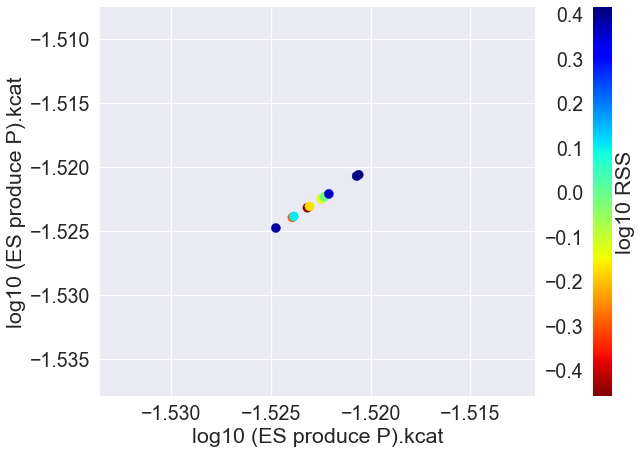

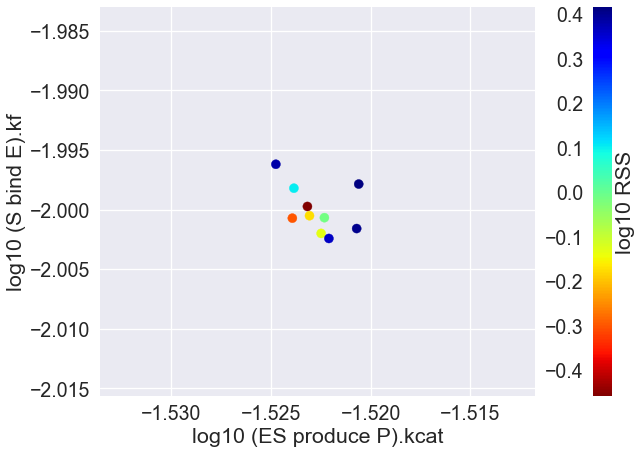

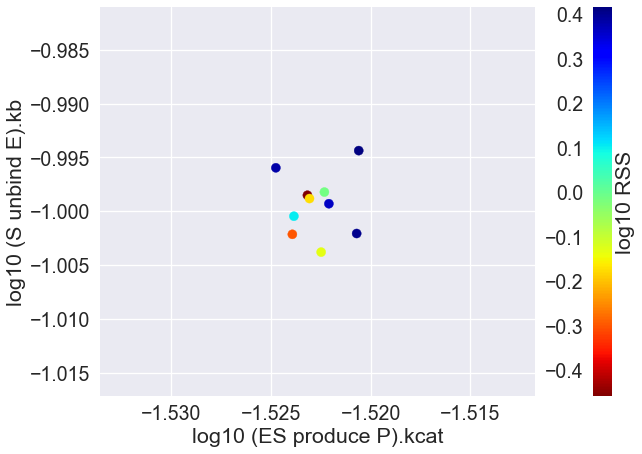

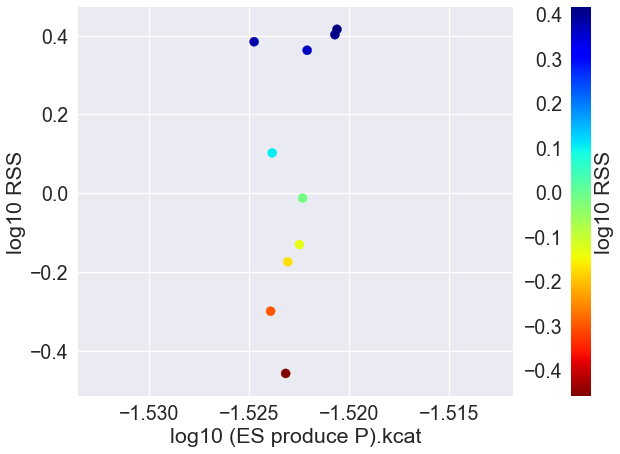

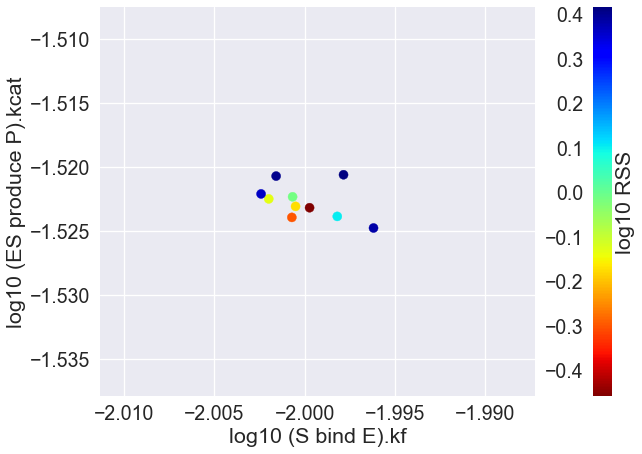

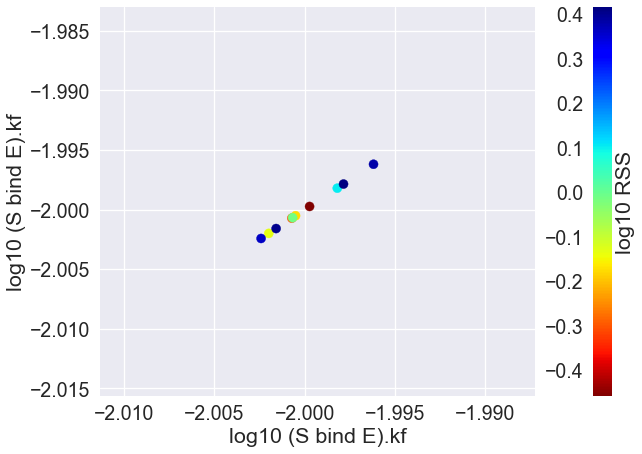

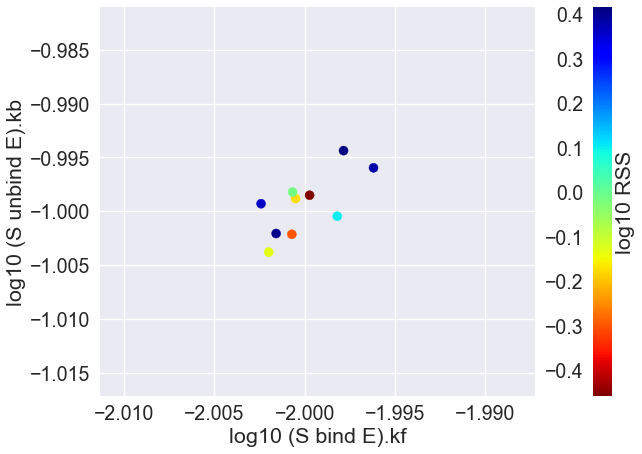

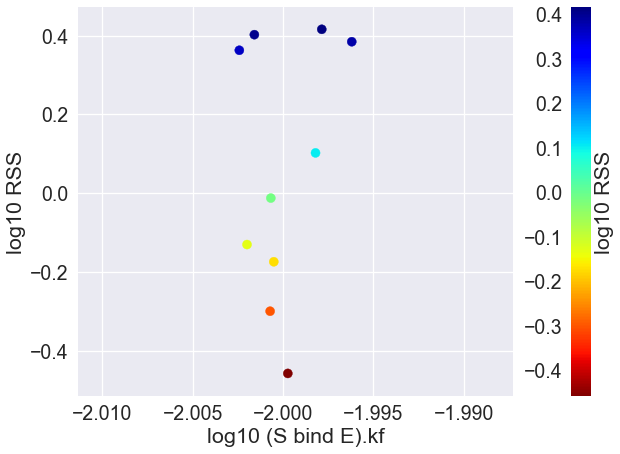

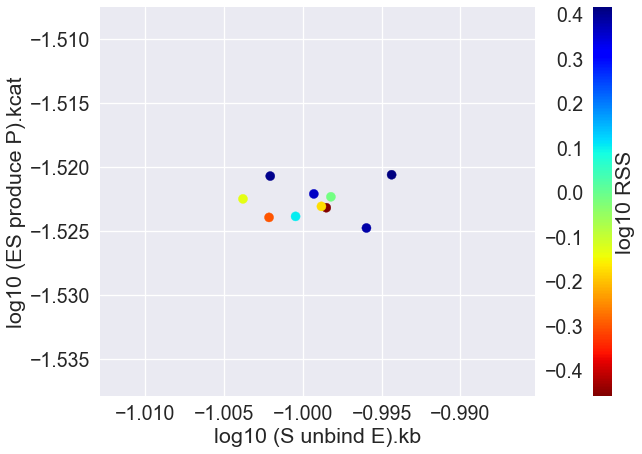

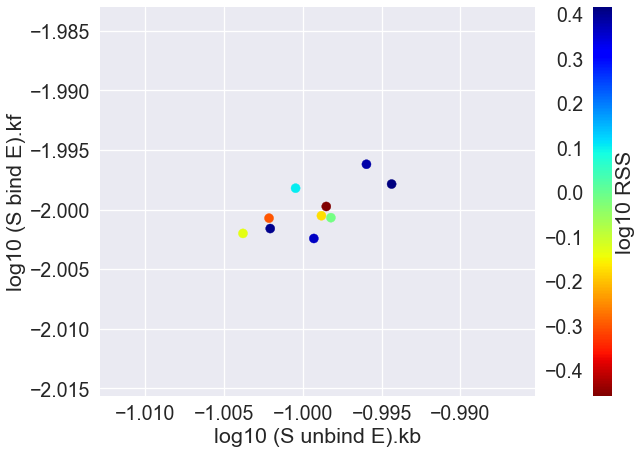

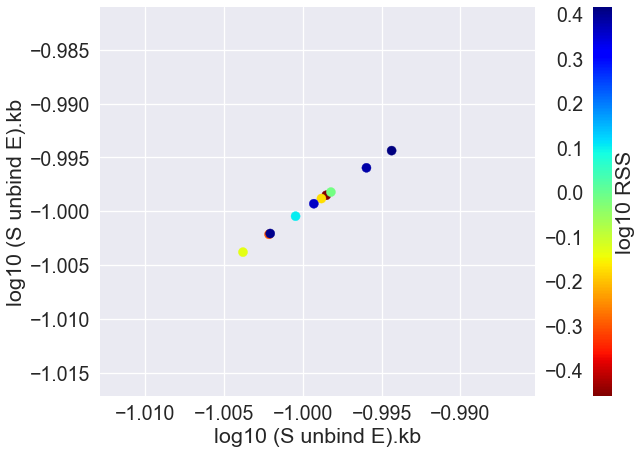

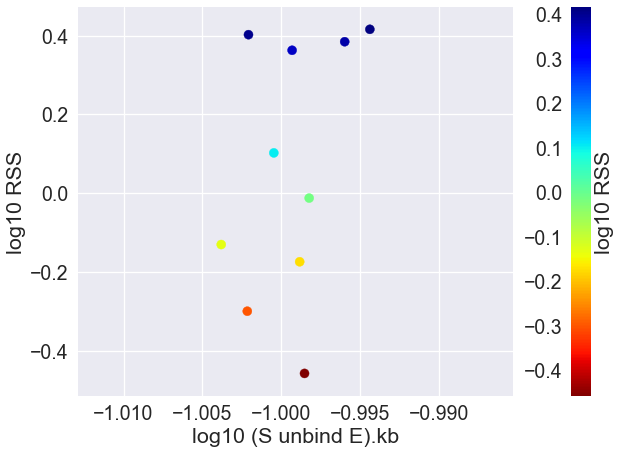

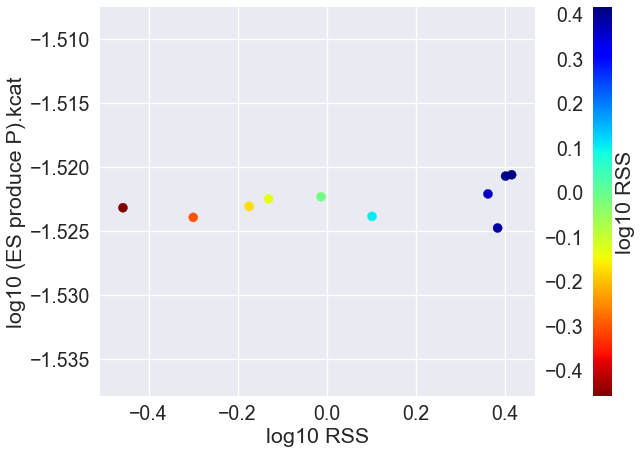

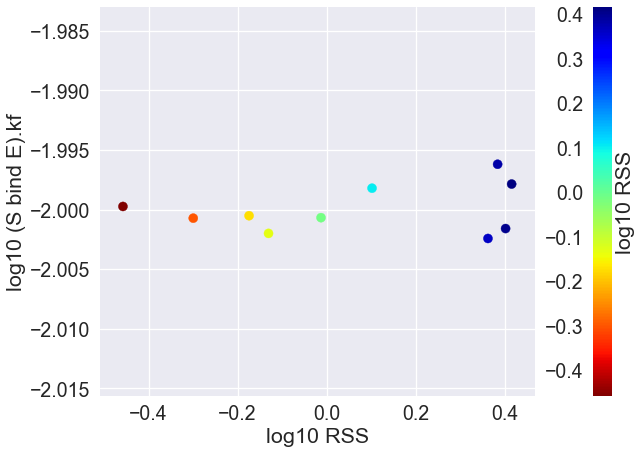

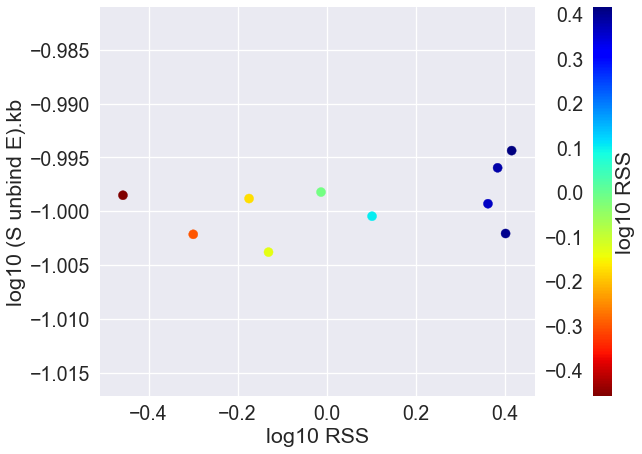

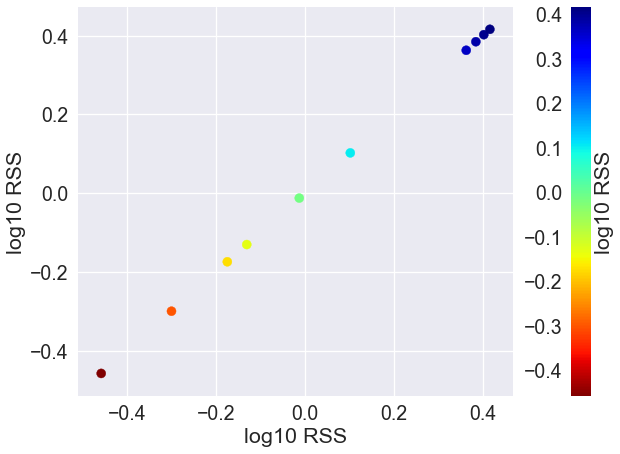

In [51]:
viz.Scatters(PE, x='all', y='all', log10=True, truncate_mode='ranks', theta=range(10))

### Profile Likelihoods

In [75]:
PL = tasks.ProfileLikelihood(michaelis_menten, parameter_path=PE.results_directory, index=0, run=True,
                            max_active=4, number_of_steps=10, log10=True)

print(PL.results_directory)

pycotools.tasks:INFO:4541:    running C:\Users\Ciaran\Documents\PycotoolsQuickStart\ProfileLikelihoods\0\(S_bind_E).kf.cps
pycotools.tasks:INFO:4541:    running C:\Users\Ciaran\Documents\PycotoolsQuickStart\ProfileLikelihoods\0\(ES_produce_P).kcat.cps
pycotools.tasks:INFO:4541:    running C:\Users\Ciaran\Documents\PycotoolsQuickStart\ProfileLikelihoods\0\(S_unbind_E).kb.cps
C:\Users\Ciaran\Documents\PycotoolsQuickStart\ProfileLikelihoods


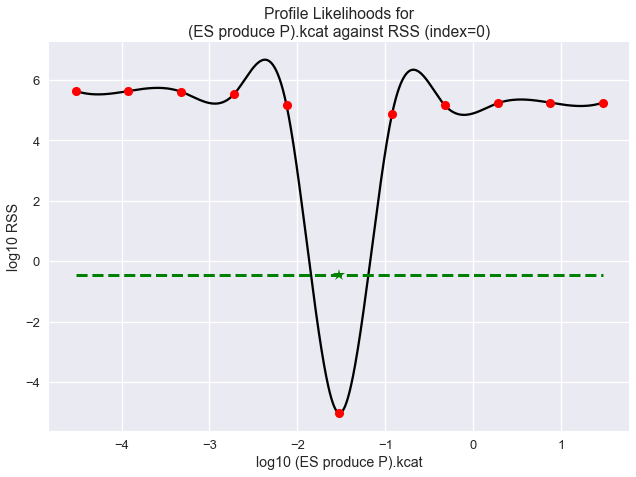

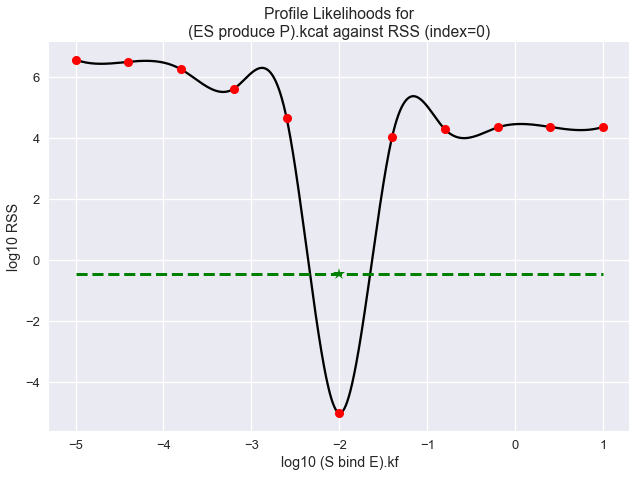

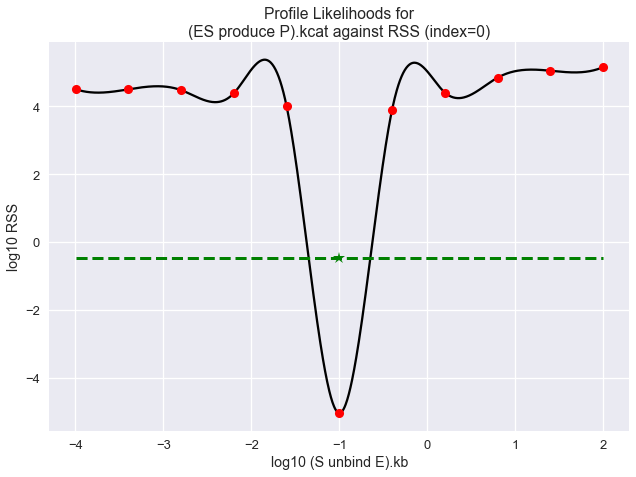

In [78]:
viz.PlotProfileLikelihood(PL, interpolation='cubic', log10=True, show_original_rss=True)

### Best Parameters
original parameters:
* kf: 0.01
* kb: 0.1
* kcat: 0.03

Best estimated parameters:

In [80]:
viz.Parse(PE).data.iloc[0]

(ES produce P).kcat    0.029980
(S bind E).kf          0.010006
(S unbind E).kb        0.100343
RSS                    0.348595
Name: 0, dtype: float64